<a href="https://colab.research.google.com/github/gshreya5/colab/blob/main/EDA_on_UCI_Obesity_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔎 Structure & Content Discoveries on Dataset about Obesity Levels in  Mexico, Peru, and Colombia


---

# 🔎INTRODUCTION

Latin American cuisine is known for its rich flavors and diverse ingredients, just thinking of empanadas, tamales, and ceviche is enough to make one's mouth water. But region's rich blend of flavors, spices, and cooking styles is not the sole cause of obesity in the region. Obesity is a complex issue that is influenced by various factors, including genetics, lifestyle, and socioeconomic status. It is important to approach the issue of obesity in Latin America with sensitivity and understanding of the complex factors that contribute to it.

## 🔎 **Goal**
This dataset from UCI includes data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

Data profiling serves three high-level objectives: structure discovery, content discovery, and relationship discovery.

Our goal is to achieve all three objectives of Data profiling.

## 📝 Let's Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np

import zipfile
from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%matplotlib inline

## 	📝 Let's load the dataset

Source : [Machine Learning Repository of the University of California, Irvine](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+)


In [4]:
#connecting google drive with colab 
drive.mount('/content/drive')
path = '/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic (2).zip'

# unzips folder
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('obesity')

#reads csv file using panda
df = pd.read_csv('/content/obesity/ObesityDataSet_raw_and_data_sinthetic.csv')

Mounted at /content/drive


# 📝 Let's explore our Dataset

In [ ]:
#reads first five rows
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


* I can see some abbreviated forms like: FAVC, FCVC ... will need to look these up

* There's some categorical features : we'll need to convert them to numericals

In [ ]:
# returns tuple(rows, cols) in dataset
df.shape

(2111, 17)

Our dataset has 17 columns and 2111 rows

In [ ]:
# returns list of column names
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

### Column descriptions:

* FAVC : Consume high-calorie foods frequently

* FCVC : Number of meals where you usually eat vegetables

* NCP : Number of main meals a day

* CAEC : Eat food between meals

* CH2O : Liters of water you drink a day

* SCC : Monitor the calories you consume daily

* FAF : Frequency of days per week that you often have physical activity

* TUE : Time of use of technological devices on a daily basis

* CALC : Frequency of alcohol intake.

* MTRANS : Means of transportation that you use regularly

* NObeyesdad : BMI (Target Variable)


Source : https://www.sciencedirect.com/science/article/pii/S2352914822000521

In [ ]:
# provides summary on the data and it's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

There are 2 dtypes present in the dataset: object and float64

In [ ]:
# Statistics of numerical columns
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


* Age lies between 14 to 61, which is good because it means data seems accurate and there are no erroneous values.

  75 % percentile is 26, data must be mostly populated with younger population 
* height, weight look fine.
* Number of meals where you usually eat vegetables, FCVC : looks like almost everyone has 2.4 times veggies in a day 
* Number of main meals a day, NCP : almost everyone seem to be having 3 meals a day except a few
* A quick google search says that avg amount of water to be consumed in a day (CH20) should be about 3 liters which is about a liter more than avg for our data  
* FAF : Frequency of days per week that you often have physical activity , mean value is 1 👀, not great in context of obesity

In [ ]:
# Stats on Categorical columns
df.describe(include = object)

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


* More than 80% have some family history with overweight issues.
* About same number of males and females
* FAVC : Consume high-calorie foods frequently  -- about 90% answeres yes
* CAEC : Eat food between meals --  80% answer yes
* SMOKE : almost all participants don't smoke
* SCC (monitor calories) : almost all participants answered no
* CALC (alcohol) : More than half answered 'Sometimes'
* MTRANS : About 75% take public transportation

Let's check if data has empty values

In [ ]:
#counts all null values
df.isna().sum().sum()

0

Small win!! 

Otherwise we would need to handle missing values, one such method is

fillna(), used to fill null values with a specified value



Let's check if data has any duplicates

In [ ]:
df[df.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


It does! 
We need to remove all duplicates except the first

In [5]:
df.drop_duplicates(inplace = True, keep='first')

Let's check how many unique values are present per column

In [ ]:
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

BMI is useful to gauge if an individual's weight is in healthy proportion to their height.

However, it is important to note that BMI is not a perfect measure of obesity and has limitations. 


Let's calculate BMI and drop Height and Weight columns

In [6]:
df['BMI'] = df['Weight']/(df['Height']**2)

In [7]:
del df['Weight'], df['Height']

## 📝 Visualization

pairplot() is a data visualization tool used to plot pairwise relationships between variables within a dataset. 

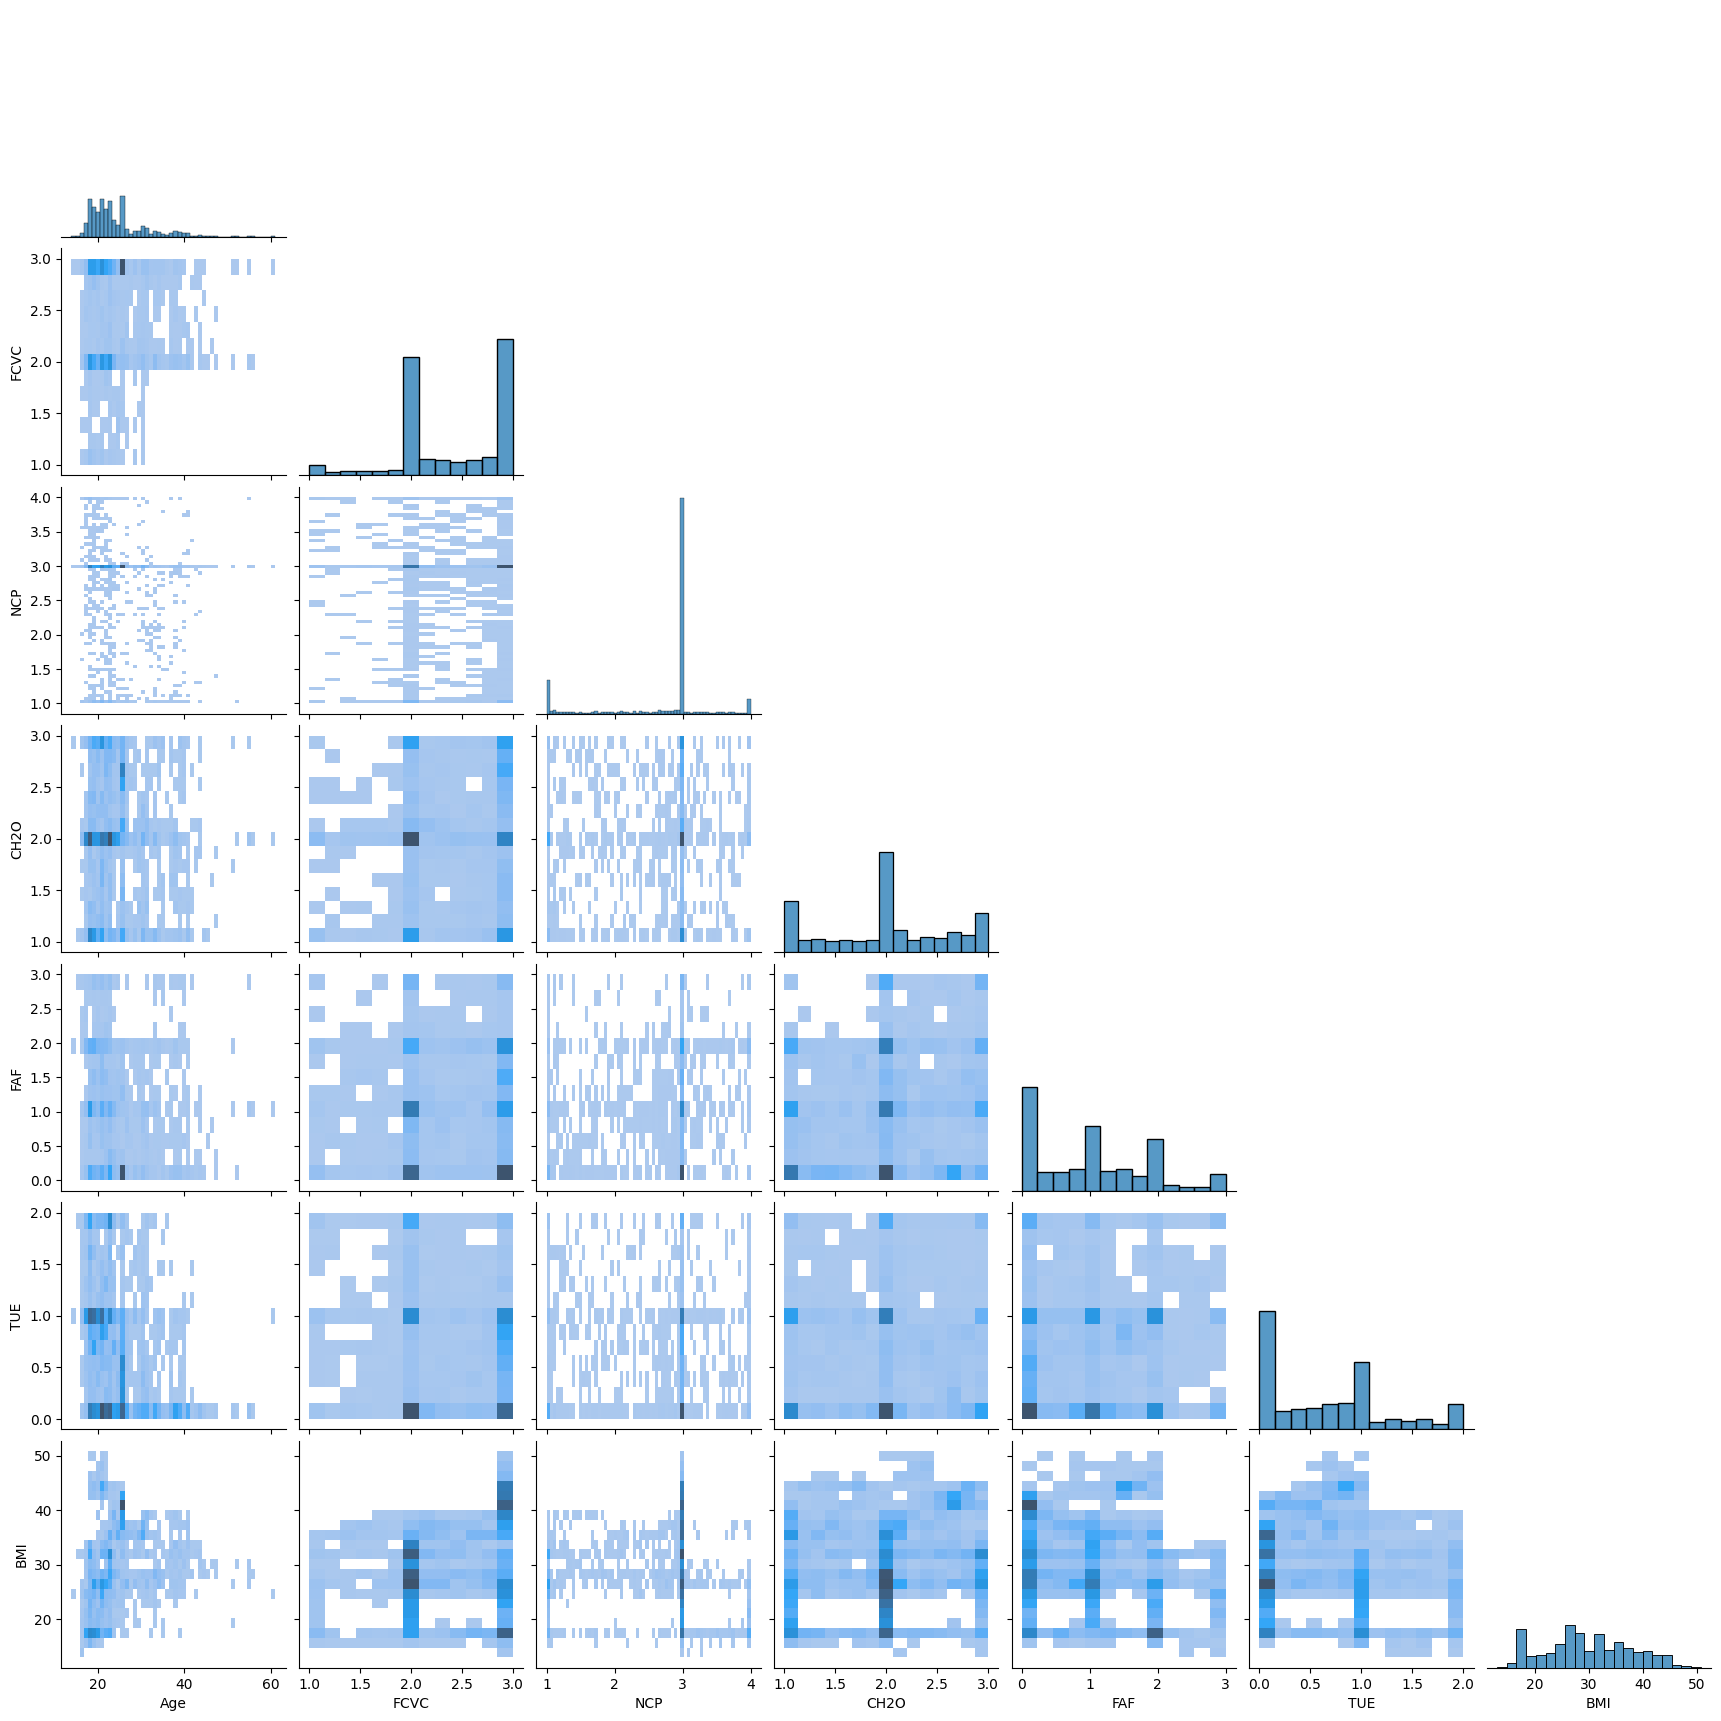

In [ ]:
sns.pairplot(df, corner=True, kind = 'hist');

* The diagonal of the grid shows a histogram plot of variables, while the off-diagonal plots show the pairwise relationships between the variables

* Here, figures are too populated to infer much, will try with better viz. 
* One thing that jumps out though is that histograms seem to have multiple peaks (i.e, multimodal frequency distributions), which could be due to the effect, underlying categorical variables have on the numerical variables,

  will need to investigate more 



**Hypothesis testing** is a statistical inference method that uses data to draw conclusions about a parameter. It involves making a tentative assumption about the parameter , called the null hypothesis (H0), and then using data to determine whether there is enough evidence to **reject** or **fail to reject** the null hypothesis. There are various types of statistical tests used for hypothesis testing, such as z-tests, t-tests, f-tests.



To check if there is a statistically significant difference in means,

we start off with calculating the means of a numerical variables corresponding to each categorical variables,

then, calculate p-value using ANOVA


In [21]:
p_values = {'num_col':[],'cat_col':[],'p_value':[]}

for num_col in df.select_dtypes(float):
  for cat_col in df.select_dtypes(object):

    list_groups_cat_df = []
    for level in df[cat_col].unique():
      list_groups_cat_df.append(df[num_col][df[cat_col] ==  level])

    s,p = stats.f_oneway(*list_groups_cat_df)      
    p_values['num_col'].append(num_col)
    p_values['cat_col'].append(cat_col)
    p_values['p_value'].append(p)

p_value = pd.DataFrame.from_dict(p_values)


null hypothesis (H0) -> there is no significant difference between the categorical groups being compared 

significance level   -> 0.05

In [86]:
p_value.head()

,num_col,cat_col,p_value
0,Age,Gender,2.069195e-02
1,Age,family_history_with_overweight,2.408965e-20
2,Age,FAVC,3.497896e-03
3,Age,CAEC,1.008924e-08
4,Age,SMOKE,2.974898e-05


P-value < 0.05 indicates no significant difference in the means of the groups, thus rejecting null hypothesis that they are not significantly different.

So all the tests with P-value < 0.05 are stored in statistically_sig df


In [17]:
statistically_sig =  p_value[p_value['p_value']<0.05]

In [25]:
statistically_sig

,num_col,cat_col,p_value
0,Age,Gender,2.069195e-02
1,Age,family_history_with_overweight,2.408965e-20
2,Age,FAVC,3.497896e-03
3,Age,CAEC,1.008924e-08
4,Age,SMOKE,2.974898e-05
5,Age,SCC,6.500912e-08
6,Age,CALC,2.400651e-03
7,Age,MTRANS,1.897807e-205
8,Age,NObeyesdad,3.246862e-86
9,FCVC,Gender,1.314196e-36


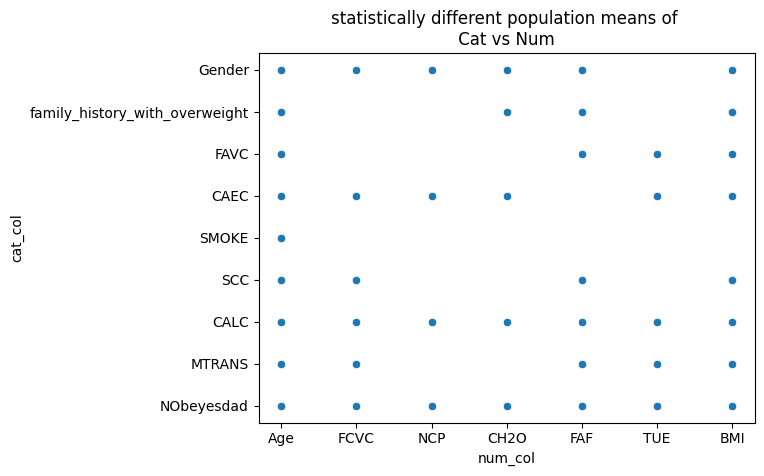

In [96]:
sns.scatterplot(data=statistically_sig, x='num_col', y='cat_col' ).set_title('statistically different population means of \n Cat vs Num ');

The above viz represents, all the categorical columns that have a 

significant difference between the groups corresponding to each numerical column 

* NObeyesdad, CALC is statistically different against all numerical columns;

  Obesity levels and alcohol consumption are  
* family history is statistically different against BMI
* FAVC is NOT statistically different against FCVC and NCP, perhaps because one has same dietary habits. 
* Smoke does not seem statistically different


However, it is important to note that the rejection of the null hypothesis only tells us that there is a significant difference between the groups; it does not provide information on which specific groups are different or the size of the effect. 

Post-hoc tests, such as Tukey's HSD, can be performed to identify the specific group differences that are significant.

In [97]:
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# for num, cat in zip(statistically_sig['num_col'],statistically_sig['cat_col']):
#   summary = pairwise_tukeyhsd(endog=df[num], groups=df[cat], alpha=0.05).summary()
#   res = pd.DataFrame(data=summary.data[1:], columns=summary.data[0])
#   print(res)

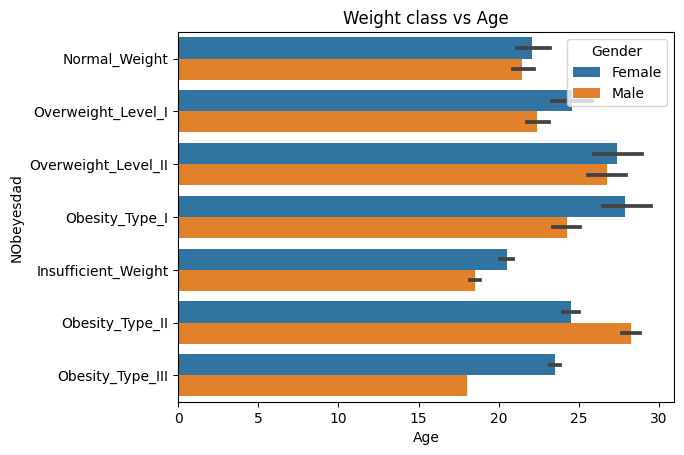

In [ ]:
sns.barplot(data=df, y="NObeyesdad", x="Age", hue = 'Gender').set_title('Weight class vs Age');

It seems females have higher mean age than males for each category besides type II obesity.

People in their 20s mostly seem to be be in obesity weight class.  



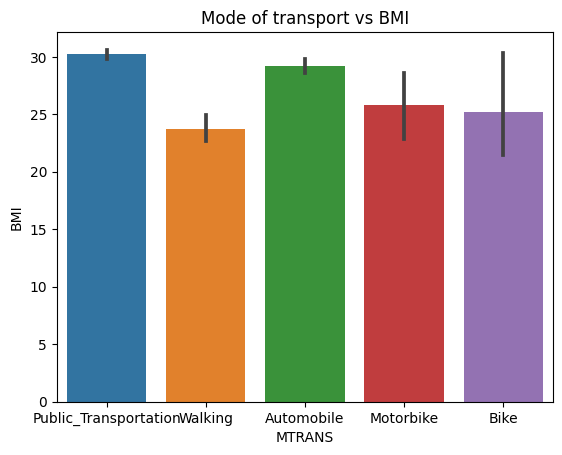

In [ ]:
sns.barplot(data=df,x='MTRANS',y='BMI').set_title('Mode of transport vs BMI');

People who walk have lowest BMI, whlie who take Public Transportation have highest BMI, recall that we noticed earlier that most individuals prefer Public Transportation.

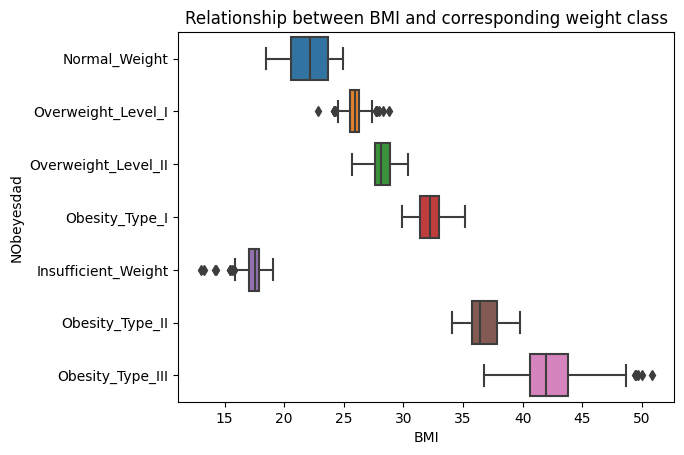

In [ ]:
sns.boxplot(data=df, y="NObeyesdad", x="BMI",).set_title('Relationship between BMI and corresponding weight class');

Graph shows clearly the relationship is strong between weight class and BMI minus a few outliers.

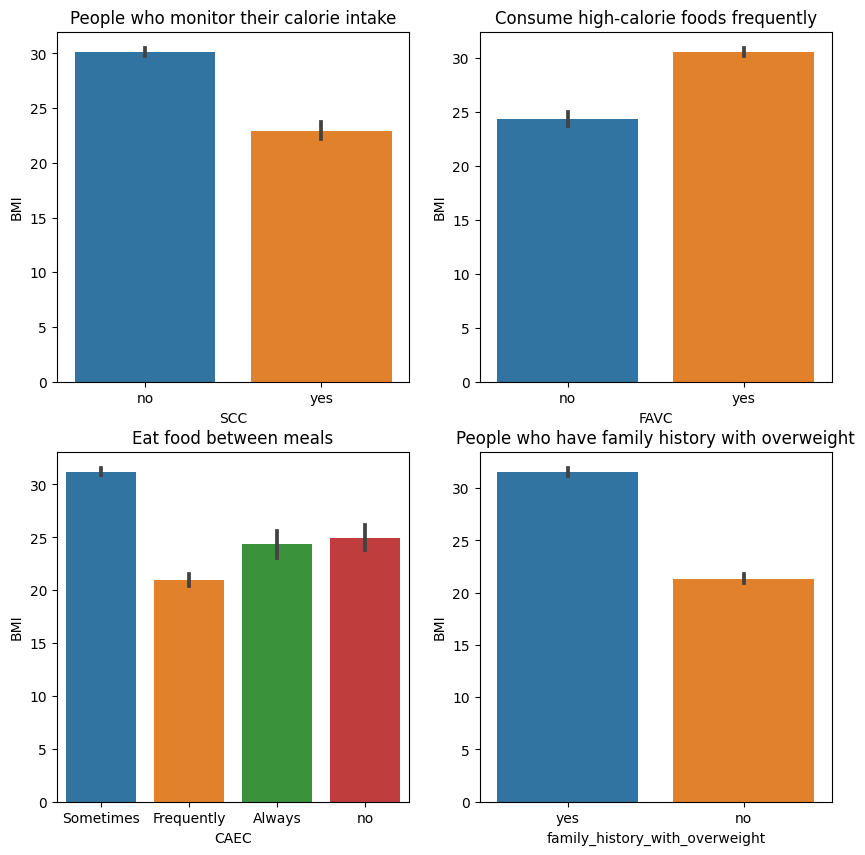

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

sns.barplot(data=df,x='SCC',y='BMI',ax=axs[0,0]).set_title('People who monitor their calorie intake');

sns.barplot(data=df,x='FAVC',y='BMI',ax=axs[0,1]).set_title('Consume high-calorie foods frequently');

sns.barplot(data=df,x='CAEC',y='BMI',ax=axs[1,0]).set_title('Eat food between meals');

sns.barplot(data=df,x='family_history_with_overweight',y='BMI',ax=axs[1,1]).set_title('People who have family history with overweight');

* People who monitor their calorie intake seem to have lower BMI, recall that most were not checking their calorie intake,

 and we should acknowledge that obsessively tracking calorie intake is dangerous for individuals with eating disorder.

* People who consume high calorie food have higher BMI, maybe because individuals don't really burn this calorie off because of their lifestyle (use of public transportation, no exercise)

* Among individuals who eat in between meals, who eat sometimes rather than all the time or frequenly or not at all, have higher BMI. This could be due to anything from their choice of snacks to their dietary habits like binging.

* People with family history seem to have higher BMI, leading to question whether it's genetics? Exploring this further is out of scope of this EDA.

## 📝 Transform Categorical features to Numerical

Numerical features are easier to work with statistically.

In [ ]:
collection = {}

#function that transforms a categorical column to numerical
def cat_to_num(col):
  values= df[col].unique()
  ind = range(len(values))
  dic=dict(zip(values,ind))
  collection[col] = dic
  df[col].replace(dic,inplace=True) 


In [ ]:
for col in df.select_dtypes('object').columns:
  cat_to_num(col)

Let's check if everything went smoothly

In [ ]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,0,0,2.0,3.0,0,0,2.0,0,0.0,1.0,0,0,0,24.386526
1,0,21.0,0,0,3.0,3.0,0,1,3.0,1,3.0,0.0,1,0,0,24.238227
2,1,23.0,0,0,2.0,3.0,0,0,2.0,0,2.0,1.0,2,0,0,23.765432
3,1,27.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,1,1,26.851852
4,1,22.0,1,0,2.0,1.0,0,0,2.0,0,0.0,0.0,1,0,2,28.342381


# 📝  Correlation

    Correlation describes the relationship between two variables

In [ ]:
df.corr().sort_values(by = 'NObeyesdad',ascending=False).NObeyesdad

NObeyesdad                        1.000000
BMI                               0.662191
FCVC                              0.339929
FAVC                              0.226236
NCP                               0.146897
CALC                              0.098210
CH2O                              0.081002
Age                               0.080222
SMOKE                            -0.031886
TUE                              -0.042238
Gender                           -0.127926
FAF                              -0.142296
MTRANS                           -0.148298
SCC                              -0.172887
CAEC                             -0.262454
family_history_with_overweight   -0.267888
Name: NObeyesdad, dtype: float64

BMI, FCVC, FAVC, family history, CAEC, SCC  have highest association with Weight classes, whereas age, water intake, gender didn't have much association.




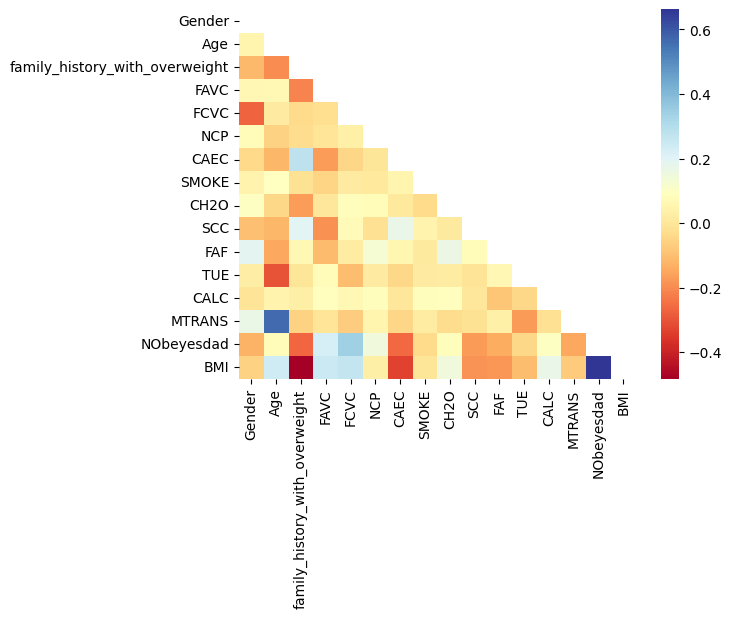

In [ ]:
matrix = np.triu(df.corr())

sns.heatmap(df.corr(),cmap ="RdYlBu",mask=matrix);

#### In conclusion,

**It's an individuals relationship with food, their dietary habits, genetics, BMI(weight, height) that determine individual's weight class and not their age or gender.** 


### Future Scope
* Since our goal is to predict "NObeyesdad", Weight class levels, which are multi class and do not seem to have linear relation with anything except BMI(Weight,Height) in my opinion Decision Trees will be a good model if not best.





Thank you for tagging along.

Feedback is appreciated.
